# Data Augmentation study

## Common Parameters

In [111]:
sys.path.append("..") # Adds higher directory to python modules path.
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import *
from helpers import *
from visuals import *
from data.data_loader import *

import pandas as pd
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score
from visuals import plot_confusion_matrix
from tensorflow.keras import utils
from keras_numpy_backend import categorical_crossentropy

from Augmentor import Operations
from Augmentor.Operations import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

data_folder = "../data/isic2019/"
model_folder = 'models'
history_folder = 'history'
pred_result_folder_val = 'val_predict_results'
pred_result_folder_test = 'test_predict_results'

model_name = 'DenseNet201'
postfix = 'best_balanced_acc'

models_info = read_models_info(history_folder, pred_result_folder_val, pred_result_folder_test)

training_image_folder = os.path.join(data_folder, 'ISIC_2019_Test_Input')
ground_truth_file = os.path.join(data_folder, 'ISIC_2019_Training_GroundTruth.csv')

df_ground_truth, known_category_names, unknown_category_name = load_isic_training_data(
    training_image_folder, 
    ground_truth_file
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# DenseNet201:
* Feature extract epochs: 6.
* Start learning rate: 0.001000
* Fine tuning learning rate: 0.000010
* Dropout rate: 0.300000
* Lambda(l2): None
* Batch size: 16

## Data Analysis

Training data has 20264 samples.


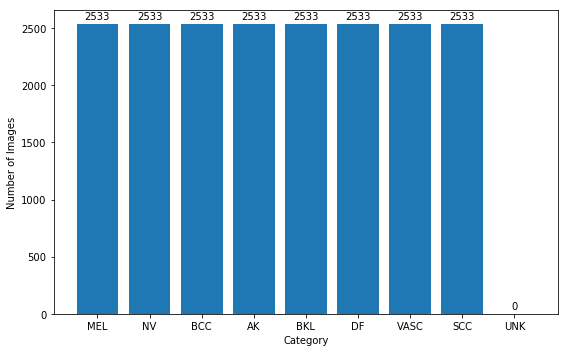

Test data has 5067 samples.


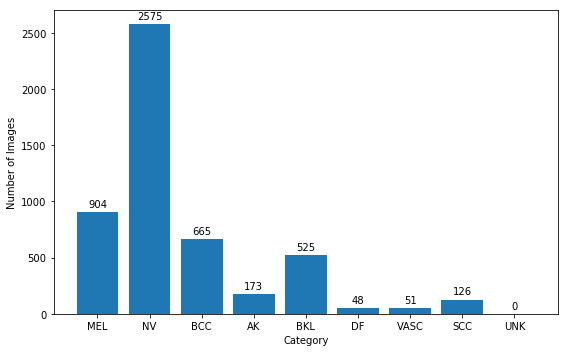

In [107]:
data_folder="../data/isic2019/sampled_balanced_20264_224_dg_0"

all_category_names, count_per_category, df_ground_truth = get_count_per_category(data_folder)
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category, df_ground_truth_test = get_count_per_category(data_folder, test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

## Impact of the different data augmentation techniques on offline data augmentation

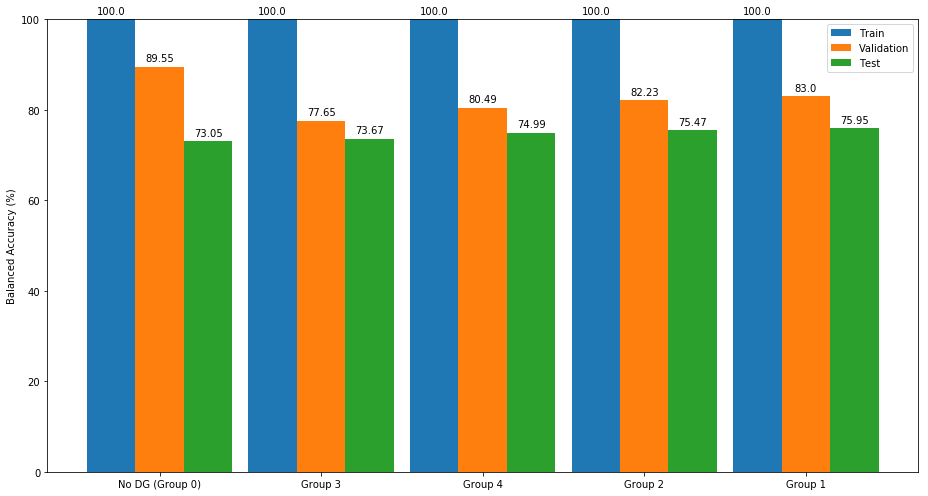

In [124]:
def xticklabelfunction(label):
    if label == "00":
        return "No DG (Group 0)"
    elif label == "10":
        return "Group 1"
    elif label == "20":
        return "Group 2"
    elif label == "30":
        return "Group 3"
    elif label == "40":
        return "Group 4"
    return "None"

fig = plot_model_comparisson_balanced_acc(
    models_info, 
    df_ground_truth,
    constant_parameters= {
        "balanced": "1",
        "samples": "20264",
        "feepochs": "2",
        "ftepochs": "100",
        "felr": "0.001",
        "ftlr": "0.0001",
        "lambda": None,
        "dropout": None,
        "batch": 16,
        "dggroup": ["00", "10", "20", "30", "40"]
    },
    figsize = (13,7),
    parameter="dggroup",
    xticklabelfunction=xticklabelfunction
)

fig.savefig(os.path.join("data_aug_group_bal_acc_comp.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)

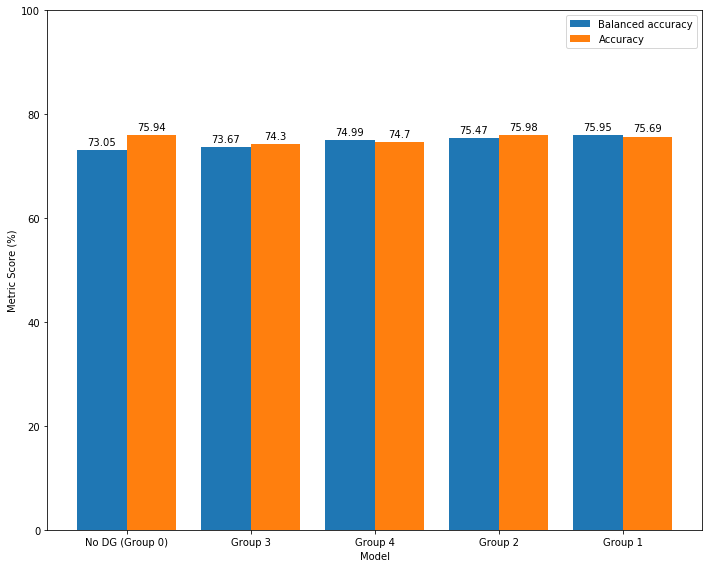

In [114]:
fig2 = plot_model_comparisson(
    models_info, 
    df_ground_truth,
    [balanced_accuracy_score, accuracy_score],
    ["Balanced accuracy", "Accuracy"],
    constant_parameters= {
        "balanced": "1",
        "samples": "20264",
        "feepochs": "2",
        "ftepochs": "100",
        "felr": "0.001",
        "ftlr": "0.0001",
        "lambda": None,
        "dropout": None,
        "batch": 16
    },
    figsize = (10,8),
    parameter="dggroup",
    parameter_filter=["00", "10", "20", "30", "40"],
    xticklabelfunction=xticklabelfunction
)

fig2.savefig(os.path.join("data_aug_group_comp.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)

## Impact of the different data augmentation approaches

11
01
00
10


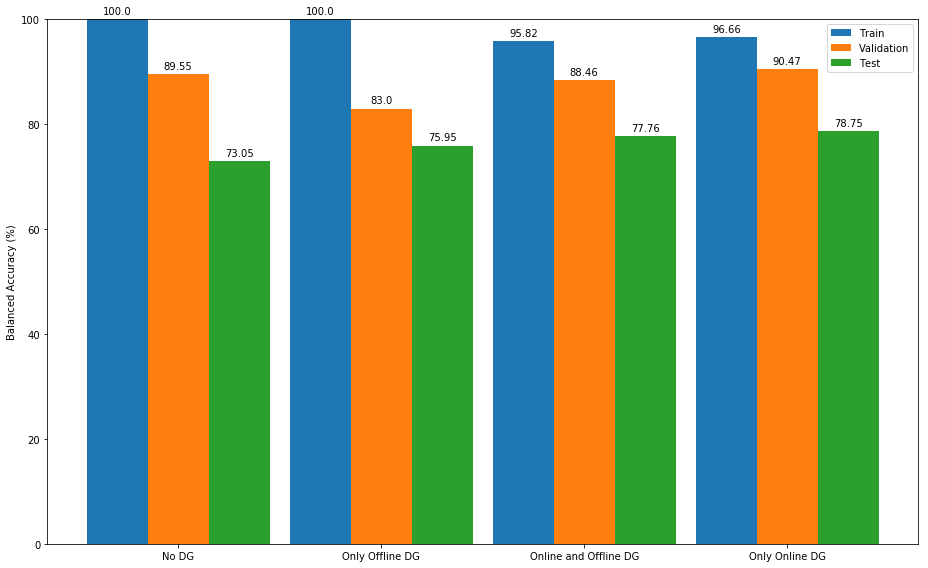

In [120]:
def xticklabelfunction(label):
    print(label)
    if label == "00":
        return "No DG"
    elif label == "01":
        return "Only Online DG"
    elif label == "10":
        return "Only Offline DG"
    elif label == "11":
        return "Online and Offline DG"
    return "None"
    
fig = plot_model_comparisson_balanced_acc(
    models_info, 
    df_ground_truth,
    constant_parameters= {
        "balanced": "1",
        "samples": "20264",
        "feepochs": "2",
        "ftepochs": "100",
        "felr": "0.001",
        "ftlr": "0.0001",
        "lambda": None,
        "dropout": None,
        "batch": 16,
        "dggroup": ["00", "01", "10", "11"]
    },
    figsize = (13,8),
    parameter="dggroup",
    xticklabelfunction=xticklabelfunction
)

fig.savefig(os.path.join("data_aug_mode_bal_acc_comp.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)    

00
01
10
11


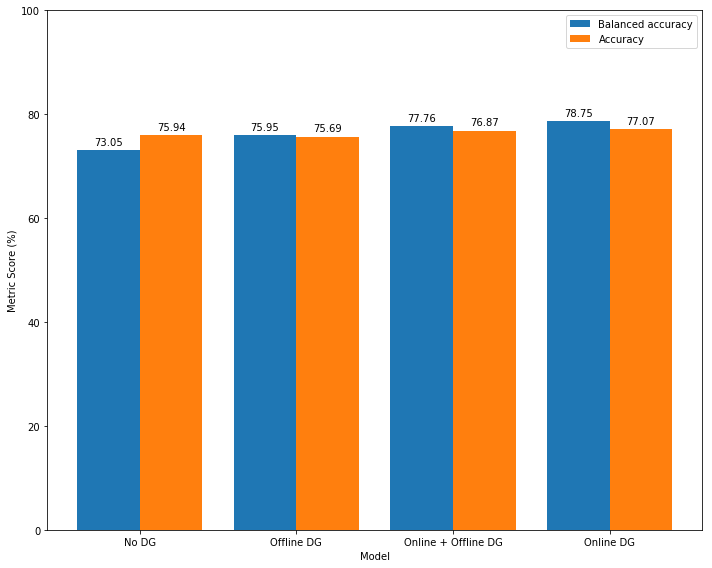

In [104]:
fig2 = plot_model_comparisson(
    models_info, 
    df_ground_truth,
    [balanced_accuracy_score, accuracy_score],
    ["Balanced accuracy", "Accuracy"],
    constant_parameters= {
        "balanced": "1",
        "samples": "20264",
        "feepochs": "2",
        "ftepochs": "100",
        "felr": "0.001",
        "ftlr": "0.0001",
        "lambda": None,
        "dropout": None,
        "batch": 16
    },
    figsize = (10,8),
    parameter="dggroup",
    parameter_filter=["00", "01", "10", "11"],
    xticklabelfunction=xticklabelfunction
)

fig2.savefig(os.path.join("data_aug_mode_test_comp.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)

# Data Augmentation Methods:
* Random Rotations.
* Random Flips
* Random Shears
* Random Brightness variations
* Random Saturation variations